In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [45]:
from scipy.cluster.vq import whiten, vq, kmeans
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from sklearn.preprocessing import normalize, scale

# FIFA '18 Dataset

In [3]:
pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [4]:
fifa = pd.read_csv('./fifa_18.csv')
print(fifa.shape)
fifa.head()

(1000, 185)


,ID,name,full_name,club,club_logo,special,age,league,birth_date,height_cm,weight_kg,body_type,real_face,flag,nationality,photo,eur_value,eur_wage,eur_release_clause,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,rs,rw,rf,ram,rcm,rm,rdm,rcb,rb,rwb,st,lw,cf,cam,cm,lm,cdm,cb,lb,lwb,ls,lf,lam,lcm,ldm,lcb,gk,1_on_1_rush_trait,acrobatic_clearance_trait,argues_with_officials_trait,avoids_using_weaker_foot_trait,backs_into_player_trait,bicycle_kicks_trait,cautious_with_crosses_trait,chip_shot_trait,chipped_penalty_trait,comes_for_crosses_trait,corner_specialist_trait,diver_trait,dives_into_tackles_trait,diving_header_trait,driven_pass_trait,early_crosser_trait,fan's_favourite_trait,fancy_flicks_trait,finesse_shot_trait,flair_trait,flair_passes_trait,gk_flat_kick_trait,gk_long_throw_trait,gk_up_for_corners_trait,giant_throw_in_trait,inflexible_trait,injury_free_trait,injury_prone_trait,leadership_trait,long_passer_trait,long_shot_taker_trait,long_throw_in_trait,one_club_player_trait,outside_foot_shot_trait,playmaker_trait,power_free_kick_trait,power_header_trait,puncher_trait,rushes_out_of_goal_trait,saves_with_feet_trait,second_wind_trait,selfish_trait,skilled_dribbling_trait,stutter_penalty_trait,swerve_pass_trait,takes_finesse_free_kicks_trait,target_forward_trait,team_player_trait,technical_dribbler_trait,tries_to_beat_defensive_line_trait,poacher_speciality,speedster_speciality,aerial_threat_speciality,dribbler_speciality,playmaker_speciality,engine_speciality,distance_shooter_speciality,crosser_speciality,free_kick_specialist_speciality,tackling_speciality,tactician_speciality,acrobat_speciality,strength_speciality,clinical_finisher_speciality,prefers_rs,prefers_rw,prefers_rf,prefers_ram,prefers_rcm,prefers_rm,prefers_rdm,prefers_rcb,prefers_rb,prefers_rwb,prefers_st,prefers_lw,prefers_cf,prefers_cam,prefers_cm,prefers_lm,prefers_cdm,prefers_cb,prefers_lb,prefers_lwb,prefers_ls,prefers_lf,prefers_lam,prefers_lcm,prefers_ldm,prefers_lcb,prefers_gk
0,20801,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,2228,32,Spanish Primera División,1985-02-05,185.0,80.0,C. Ronaldo,True,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,95500000.0,565000.0,195800000.0,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,23,7,11,15,14,11,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,91.0,89.0,82.0,89.0,62.0,53.0,61.0,66.0,92.0,91.0,89.0,82.0,62.0,53.0,NaN,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,158023,L. Messi,Lionel Messi,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,2158,30,Spanish Primera División,1987-06-24,170.0,72.0,Messi,True,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,105000000.0,565000.0,215300000.0,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,26,6,11,15,14,8,88.0,91.0,

In [5]:
fifa.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 185 entries, ID to prefers_gk
dtypes: bool(92), float64(32), int64(48), object(13)
memory usage: 1.6 MB


## Normalizing data using `whiten` from `scipy.cluster.vq`
`whiten` divides data with its standard deviation to give it unit variance

In [6]:
fifa_ = fifa.copy()

In [7]:
# scale wage and value
fifa_['scaled_wage'] = whiten(fifa_['eur_wage'])
fifa_['scaled_value'] = whiten(fifa_['eur_value'])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


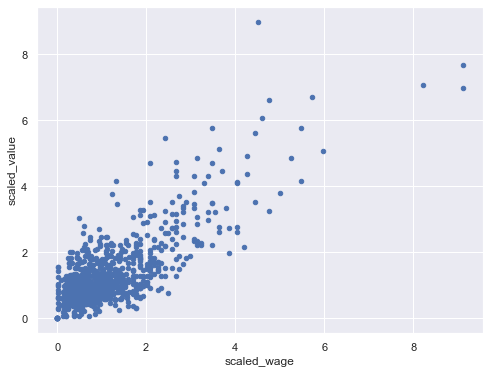

In [8]:
# scatter plot
fig, ax = plt.subplots(figsize=(8, 6))

fifa_.plot(x='scaled_wage', 
           y='scaled_value', 
           kind='scatter',
           ax=ax)

plt.show()

In [9]:
# check mean and standard deviation of scaled values
fifa_[['scaled_wage', 'scaled_value']].describe()

,scaled_wage,scaled_value
count,1000.000000,1000.000000
mean,1.119812,1.306272
std,1.000500,1.000500
min,0.000000,0.000000
25%,0.467717,0.730412
50%,0.854794,1.022576
75%,1.407184,1.542995
max,9.112425,8.984064


In [30]:
fifa5000 = pd.read_csv('./fifa_18_5000.csv')
fifa5000 = fifa5000.iloc[:5000, :]
print(fifa5000.shape)
fifa5000.head()

(5000, 2)


,sliding_tackle,aggression
0,23,63
1,26,48
2,33,56
3,38,78
4,11,29


In [31]:
fifa5000['scaled_st'] = whiten(fifa5000['sliding_tackle'])
fifa5000['scaled_a'] = whiten(fifa5000['aggression'])

In [32]:
fifa5000.head()

,sliding_tackle,aggression,scaled_st,scaled_a
0,23,63,0.967671,3.723843
1,26,48,1.093889,2.837214
2,33,56,1.388398,3.310083
3,38,78,1.598762,4.610472
4,11,29,0.462799,1.714150


In [35]:
d_matrix = linkage(fifa5000[['scaled_st', 'scaled_a']],
                   method='ward')

In [36]:
fifa5000['c_labels'] = fcluster(d_matrix, 3, criterion='maxclust')

In [38]:
fifa5000.groupby('c_labels').mean()

,sliding_tackle,aggression,scaled_st,scaled_a
c_labels,,,,
1,70.980292,73.663504,2.986331,4.354148
2,17.592000,32.792000,0.740142,1.938290
3,31.894702,61.284768,1.341895,3.622458


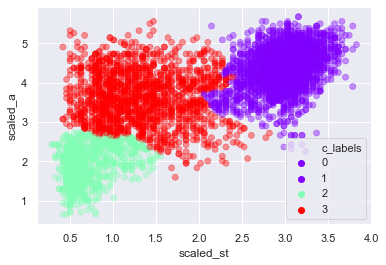

In [81]:
sns.scatterplot(x='scaled_st',
                y='scaled_a',
                hue='c_labels',
                data=fifa5000,
                edgecolor=None,
                palette='rainbow',
                alpha=0.4)
plt.show()

## Clustering based on `defending` and `physical` features

In [93]:
# set up random seed
np.random.seed([1000, 2000])

In [94]:
fifa_['scaled_def'] = whiten(fifa_['def'])
fifa_['scaled_phy'] = whiten(fifa_['phy'])

In [95]:
# fit to kmeans
cluster_centers, _ = kmeans(fifa_[['scaled_def', 'scaled_phy']], 3)

In [96]:
# assign cluster labels
fifa_['c_labels'], _ = vq(fifa_[['scaled_def', 'scaled_phy']], cluster_centers)

In [97]:
fifa_[['scaled_def', 'scaled_phy', 'c_labels']].groupby('c_labels').mean()

,scaled_def,scaled_phy
c_labels,,
0,1.948298,7.163234
1,3.817844,9.020452
2,2.072803,9.066327


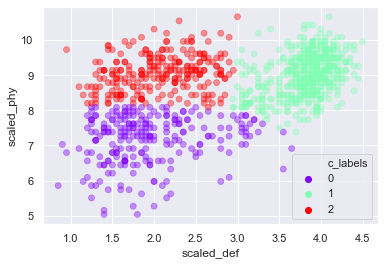

In [98]:
# plot
sns.scatterplot(x='scaled_def', 
                y='scaled_phy',
                hue='c_labels',
                data=fifa_,
                edgecolor=None,
                palette='rainbow',
                alpha=0.4)
plt.show()

# Comic-con Dataset

## Hierarchical clustering: `ward` method

In [13]:
comic = pd.read_csv('./comic_con.csv')
print(comic.shape)
comic.head()

(36, 3)


,Unnamed: 0,x_coordinate,y_coordinate
0,0,17,4
1,1,20,6
2,2,35,0
3,3,14,0
4,4,37,4


In [14]:
comic.drop('Unnamed: 0', axis=1, inplace=True)

In [15]:
comic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   x_coordinate  36 non-null     int64
 1   y_coordinate  36 non-null     int64
dtypes: int64(2)
memory usage: 704.0 bytes


In [16]:
comic['x_scaled'] = whiten(comic['x_coordinate'])
comic['y_scaled'] = whiten(comic['y_coordinate'])

In [17]:
# use linkage to get distances
d_matrix = linkage(comic[['x_scaled', 'y_scaled']],
                   method='ward',
                   metric='euclidean')

In [18]:
# assign cluster labels
comic['cluster_labels'] = fcluster(d_matrix, 2, criterion='maxclust')

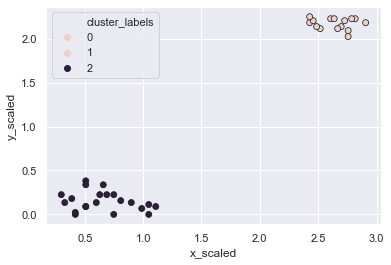

In [19]:
# plot
sns.scatterplot(x='x_scaled',
                y='y_scaled',
                hue='cluster_labels',
                data=comic,
                edgecolor='k')
plt.show()

## Hierarchical clustering: `single` method

In [20]:
# use linkage to get distances
d_matrix = linkage(comic[['x_scaled', 'y_scaled']],
                   method='single',
                   metric='euclidean')

In [21]:
# assign cluster labels
comic['cluster_labels'] = fcluster(d_matrix, 2, criterion='maxclust')

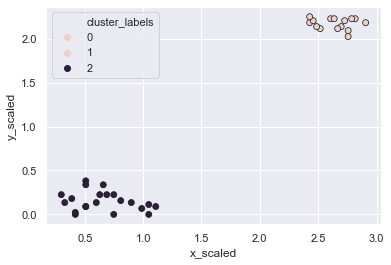

In [22]:
# plot
sns.scatterplot(x='x_scaled',
                y='y_scaled',
                hue='cluster_labels',
                data=comic,
                edgecolor='k')
plt.show()

## Hierarchical Clustering: `complete` method

In [23]:
# use linkage to get distances
d_matrix = linkage(comic[['x_scaled', 'y_scaled']],
                   method='complete',
                   metric='euclidean')

In [24]:
# assign cluster labels
comic['cluster_labels'] = fcluster(d_matrix, 2, criterion='maxclust')

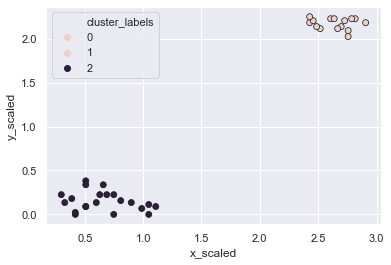

In [25]:
# plot
sns.scatterplot(x='x_scaled',
                y='y_scaled',
                hue='cluster_labels',
                data=comic,
                edgecolor='k')
plt.show()

## Visualize with `matplotlib`

In [26]:
# define colors dict for cluster
colors = {1: 'red', 
          2: 'blue'}

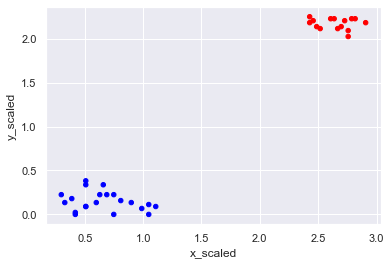

In [27]:
# plot
comic.plot.scatter(x='x_scaled',
                   y='y_scaled',
                   c=comic['cluster_labels'].apply(lambda x: colors[x]))
plt.show()

## Visualize with `seaborn`

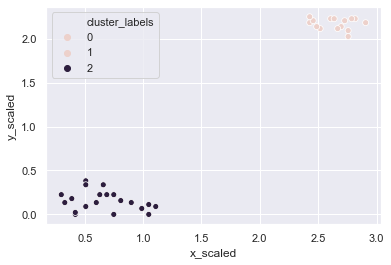

In [28]:
sns.scatterplot(x='x_scaled', 
                y='y_scaled',
                hue='cluster_labels',
                data=comic)
plt.show()

## Dendrogram

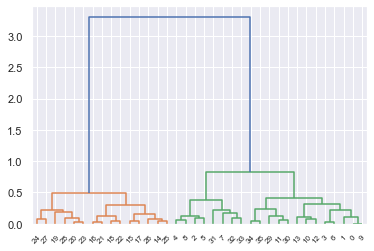

In [29]:
dn = dendrogram(d_matrix)
plt.show()

## K-means clustering with `scipy`

In [49]:
# generate cluster centers
cluster_centers, distortion = kmeans(comic[['x_scaled', 'y_scaled']], 2)

In [51]:
# assign cluster labels
comic['c_labels'], distortion_list = vq(comic[['x_scaled', 'y_scaled']], cluster_centers)

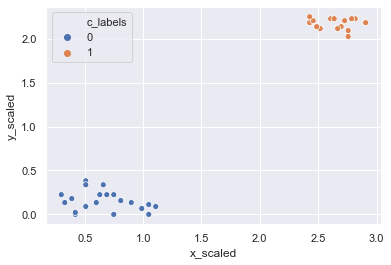

In [52]:
# plot clusters
sns.scatterplot(x='x_scaled',
                y='y_scaled',
                hue='c_labels',
                data=comic)
plt.show()

## Elbow method on choosing clusters

In [53]:
distortions = []
num_clusters = range(1, 7)

In [54]:
# create list of distortions from the kmeans function
for i in num_clusters:
    cluster_centers, distortion = kmeans(comic[['x_scaled', 'y_scaled']], i)
    distortions.append(distortion)

In [55]:
elbow = pd.DataFrame({'num_clusters': num_clusters,
                      'distortions': distortions})

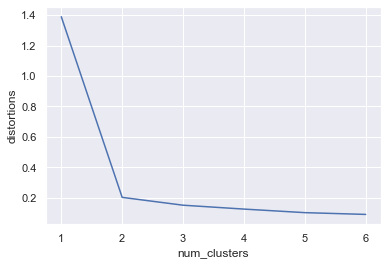

In [56]:
# plot
sns.lineplot(x='num_clusters',
             y='distortions',
             data=elbow)
plt.xticks(num_clusters)
plt.show()

Note that for uniformly distributed data, there will be **no** well-defined elbow.

# Mouse-like Dataset

In [58]:
mouse = pd.read_csv('./mouse.csv')
mouse.drop('Unnamed: 0', axis=1, inplace=True)
print(mouse.shape)
mouse.head()

(160, 2)


,x_coordinate,y_coordinate
0,33.875528,44.893421
1,38.208748,41.116327
2,35.740588,57.418006
3,32.546963,57.218082
4,62.063146,47.196944


In [59]:
mouse['x_scaled'] = whiten(mouse['x_coordinate'])
mouse['y_scaled'] = whiten(mouse['y_coordinate'])

## Uniform clustering patterns

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


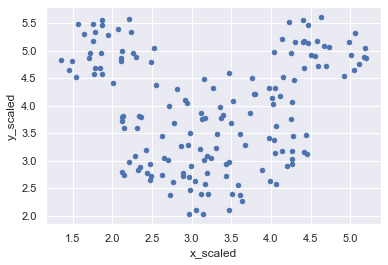

In [60]:
mouse.plot(x='x_scaled',
           y='y_scaled',
           kind='scatter')
plt.show()

With this mouse dataset, there are noticeably three visible cluster, but when using `kmeans`...

In [61]:
cluster_centers, distortion = kmeans(mouse[['x_scaled', 'y_scaled']], 3)

In [62]:
mouse['c_labels'], distortion_list = vq(mouse[['x_scaled', 'y_scaled']], cluster_centers)

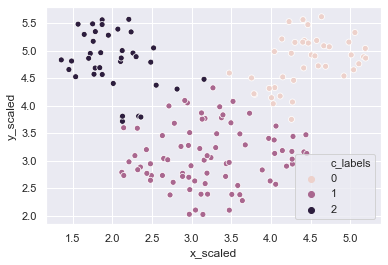

In [63]:
sns.scatterplot(x='x_scaled',
                y='y_scaled',
                hue='c_labels',
                data=mouse)
plt.show()

the two clusters at the top have taken in some points along the boundary. This is due to the underlying assumption in the algorithm to minimize distortions.